In [116]:
import numpy as np
from sklearn import datasets, model_selection
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [117]:
def load_dataset(split):       
    f = open("01_homework_dataset.csv")
    f.readline()  # skip the header
    dataset = np.loadtxt(f, delimiter=",")
    #dataset = pd.read_csv('01_homework_dataset.csv')
    X, y = dataset[:,:3], dataset[:,3]    
    return X, y

In [118]:
def euclidean_distance(x1, x2):
    return np.linalg.norm(np.subtract(x1,x2))

In [119]:
def get_neighbors_labels(X, y, x_new, k):   
    euc_l = np.empty((0, 2), int)
    # getting an array [euclidean distance, label]
    for i in range(len(X)):
        euc_l = np.append(euc_l, [[euclidean_distance(X[i], x_new), y[i]]], axis=0)
    # sorting an array through the euclidean distance   
    euc_l = euc_l[euc_l[:, 0].argsort()]  
    return euc_l[0:k, 1]

In [120]:
def get_response(neighbors, num_classes=3):    
    m_dict = {'max': [0, 0]}
    """ 
    generating a dictionary where 
    m_dict['max'] = [label, number of values]
    m_dict[label] = number of values
    """
    for i in neighbors:
        if i in m_dict:
            m_dict[i] += 1
            if m_dict[i] > m_dict['max'][1]:
                m_dict['max'][0] = i
                m_dict['max'][1] = m_dict[i]
        else:
            m_dict[i] = 1
            if m_dict['max'][1] == 0:
                m_dict['max'][0] = i
                m_dict['max'][1] = 1    
    return m_dict['max'][0]

In [124]:
X, y = load_dataset(split)

In [125]:
def get_answer_4(X, y, x_new, k):
    return get_response(get_neighbors_labels(X, y, x_new, k))
x1 = get_answer_4(X, y, [4.1, -0.1, 2.2], k)
x2 = get_answer_4(X, y, [6.1, 0.4, 1.3], k)
print('x1 = {0}'.format(x1))
print('x2 = {0}'.format(x2))

x1 = 0.0
x2 = 2.0


In [126]:
def get_answer_5(X, y, x_new, k):
    print(get_neighbors_labels(X, y, x_new, k))
    return np.sum(get_neighbors_labels(X, y, x_new, k))/k
k = 3
x1 = get_answer_5(X, y, [4.1, -0.1, 2.2], k)
x2 = get_answer_5(X, y, [6.1, 0.4, 1.3], k)
print('x1 = {0}'.format(x1))
print('x2 = {0}'.format(x2))

[ 0.  2.  1.]
[ 2.  0.  2.]
x1 = 1.0
x2 = 1.3333333333333333


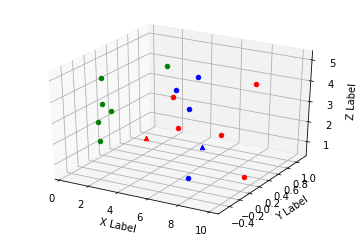

In [72]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(len(X)):
    xs = X[i][0]
    ys = X[i][1]
    zs = X[i][2]
    if y[i] == 0:
        c = 'r'
    elif y[i] == 1:
        c = 'g'
    else:
        c = 'b'
    ax.scatter(xs, ys, zs, c=c, marker='o')
ax.scatter(4.1, -0.1, 2.2, c='r',marker='^')
ax.scatter(6.1, 0.4, 1.3, c='b',marker='^')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()


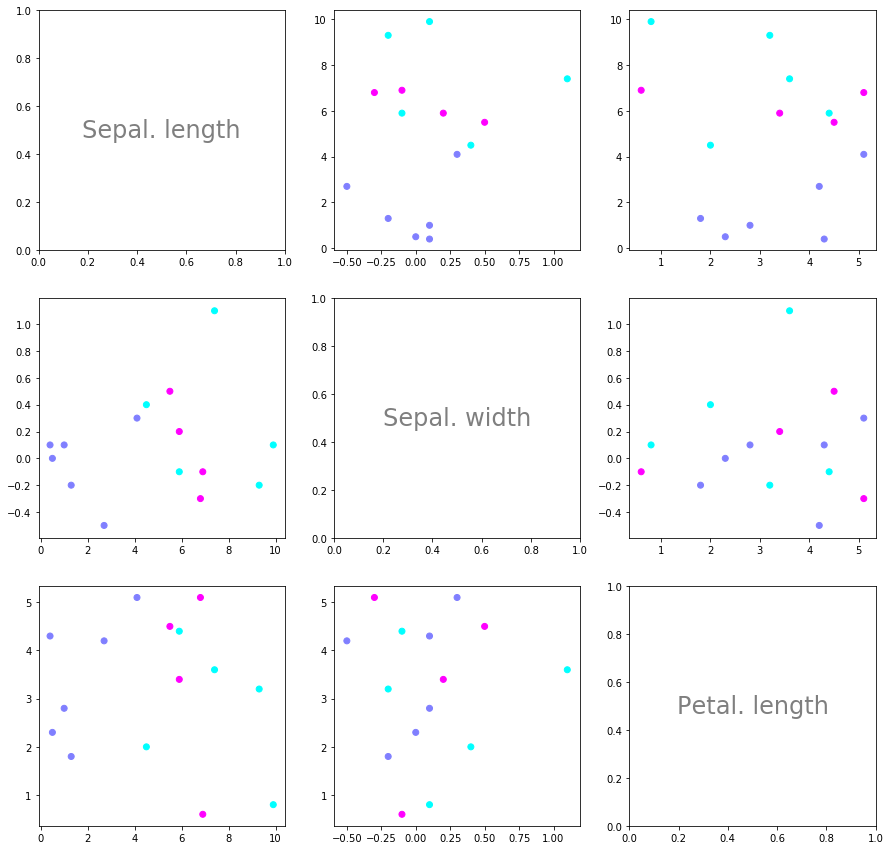

In [127]:
f, axes = plt.subplots(3, 3,figsize=(15, 15))
for i in range(3):
    for j in range(3):
        if j == 0 and i == 0:
            axes[i,j].text(0.5, 0.5, 'Sepal. length', ha='center', va='center', size=24, alpha=.5)
        elif j == 1 and i == 1:
            axes[i,j].text(0.5, 0.5, 'Sepal. width', ha='center', va='center', size=24, alpha=.5)
        elif j == 2 and i == 2:
            axes[i,j].text(0.5, 0.5, 'Petal. length', ha='center', va='center', size=24, alpha=.5)
        elif j == 3 and i == 3:
            axes[i,j].text(0.5, 0.5, 'Petal. width', ha='center', va='center', size=24, alpha=.5)
        else:
            axes[i,j].scatter(X[:,j],X[:,i], c=y, cmap=plt.cm.cool)